In [21]:
from keras._tf_keras.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.applications.vgg16 import VGG16, preprocess_input
from keras._tf_keras.keras.preprocessing import image
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix  
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

IMAGE_SIZE = [100, 100]

EPOCHS = 5
BATCH_SIZE = 32

DATA_PATH = '../assets/fruits-360-small'
TRAIN_DIR = f'{DATA_PATH}/Training'
TEST_DIR = f'{DATA_PATH}/Test'


../assets/fruits-360-small/Training/Strawberry/130_100.jpg


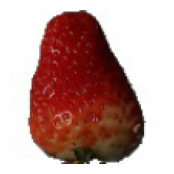

In [19]:
train_imgs  = glob(f'{TRAIN_DIR}/*/*.jp*g')
test_imgs = glob(f'{TEST_DIR}/*/*.jp*g')

folders = glob(f'{TRAIN_DIR}/*') # list of classes

print(train_imgs[0])
plt.figure(figsize=(2, 2))
plt.imshow(image.load_img(train_imgs[0]))
plt.axis('off')
plt.show()

In [25]:
# drop dense layers of the VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=x)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │        36,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,751,560 (56.27 MB)

 Trainable params: 36,872 (144.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 3827 images belonging to 8 classes.
Found 1285 images belonging to 8 classes.
Class indicies: {'Apple Golden 1': 0, 'Avocado': 1, 'Banana': 2, 'Kiwi': 3, 'Lemon': 4, 'Mango': 5, 'Raspberry': 6, 'Strawberry': 7}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -100.527374 max: 151.061


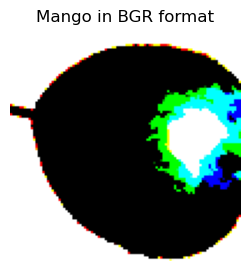

In [41]:
gen = ImageDataGenerator(
  rotation_range=20, 
  width_shift_range=0.1, 
  height_shift_range=0.1, 
  shear_range=0.1, 
  zoom_range=0.2, 
  horizontal_flip=True, 
  vertical_flip=True, 
  preprocessing_function=preprocess_input
)

train_gen = gen.flow_from_directory(
    TRAIN_DIR, 
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=BATCH_SIZE,
)
test_gen = gen.flow_from_directory(
    TEST_DIR, 
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=BATCH_SIZE,
)

print('Class indicies:', test_gen.class_indices)
labels = [None] * len(folders)
for k, v in test_gen.class_indices.items():
    labels[v] = k

# VGG was trained on images with BGR channels
for x, y in test_gen:
    print("min:", x[0].min(), "max:", x[0].max())
    plt.figure(figsize=(3, 3))
    plt.title(f'{labels[np.argmax(y[0])]} in BGR format')
    plt.axis('off')
    plt.imshow(x[0])
    plt.show()
    break

In [42]:
history = model.fit(
  train_gen, 
  validation_data=test_gen, 
  epochs=EPOCHS,
  steps_per_epoch=len(train_gen) // BATCH_SIZE,
  validation_steps=len(test_gen) // BATCH_SIZE, 
)


Epoch 1/5


/home/jakubner/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1722603988.364272    9424 service.cc:146] XLA service 0x7400b4004960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722603988.364444    9424 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-08-02 15:06:28.449572: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-02 15:06:28.957416: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1484 - loss: 17.7128

I0000 00:00:1722603996.904569    9424 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.2201 - loss: 15.8870 - val_accuracy: 0.5938 - val_loss: 3.2531
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.7604 - loss: 3.4044 - val_accuracy: 0.8750 - val_loss: 1.2188
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.7982 - loss: 1.5852 - val_accuracy: 0.8438 - val_loss: 1.8690
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.9362 - loss: 0.5934 - val_accuracy: 0.7812 - val_loss: 2.7768
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step - accuracy: 0.8333 - loss: 1.4352 - val_accuracy: 0.9062 - val_loss: 0.8172


In [64]:
predictions = []
targets = []
for x, y in test_gen:
    p = model.predict(x,verbose=0)
    p = np.argmax(p, axis=1)
    predictions = np.concatenate((predictions, p))
    
    y = np.argmax(y, axis=1)
    targets = np.concatenate((targets, y))

    if len(targets) >= len(test_imgs):
        break

predictions.shape, targets.shape

Found 1285 images belonging to 8 classes.


((1285,), (1285,))

In [65]:
cm = confusion_matrix(targets, predictions)
print(cm)

[[142   0   0   0  15   3   0   0]
 [  2  90   0   0   4  42   0   5]
 [  0   0 163   0   1   0   0   2]
 [  2   2   0 142   0   1   0   9]
 [ 21   0   3   0 139   1   0   0]
 [  1   6   0   0   0 159   0   0]
 [  0   0   0   0   0   0 163   3]
 [  0   0   0   0   0   0   0 164]]


Confusion matrix, without normalization
[[138   0   1   0  13   4   0   0]
 [  1  93   0   0   2  47   0   3]
 [  0   0 172   0   0   0   0   1]
 [  0   6   0 145   0   0   0   5]
 [ 11   0   1   0 131   1   0   3]
 [  0   8   0   0   0 155   0   0]
 [  0   0   0   0   0   0 171   5]
 [  0   0   0   0   0   0   0 168]]


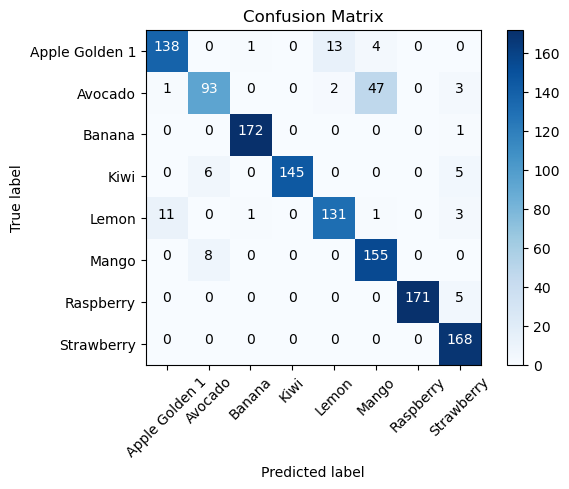

In [63]:
import sys
import os

sys.path.append(os.path.abspath('..'))
from utils import plot_confusion_matrix

plot_confusion_matrix(cm, labels, title='Confusion Matrix')